In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

all_data = pd.concat([training, test])

%matplotlib inline
all_data.columns

Index(['label', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27'],
      dtype='object')

**Assignment Planning**

In [ ]:
# List of tasks to be completed:
# Understand the nature of the data
# Histograms and boxplots
# Value counts
# Missing values
# Correlation between variables
# Explore interesting questions
# Feature engineering

Light Data Exploration

In [15]:
# I just need to get an idea of the ata types and null values
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   50000 non-null  float64
 1   f0      50000 non-null  float64
 2   f1      50000 non-null  float64
 3   f2      50000 non-null  float64
 4   f3      50000 non-null  float64
 5   f4      50000 non-null  float64
 6   f5      50000 non-null  float64
 7   f6      50000 non-null  float64
 8   f7      50000 non-null  float64
 9   f8      50000 non-null  float64
 10  f9      50000 non-null  float64
 11  f10     50000 non-null  float64
 12  f11     50000 non-null  float64
 13  f12     50000 non-null  float64
 14  f13     50000 non-null  float64
 15  f14     50000 non-null  float64
 16  f15     50000 non-null  float64
 17  f16     50000 non-null  float64
 18  f17     50000 non-null  float64
 19  f18     50000 non-null  float64
 20  f19     50000 non-null  float64
 21  f20     50000 non-null  float64
 22

The output above tells me that I have one column for the targets and the remaining columns are features represented as numerical values. There are no missing values in the provided training data.

In [12]:
training.describe()

,label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.531300,0.991232,-0.006811,-0.000732,0.993825,-0.008596,0.987553,-0.006254,-0.002803,0.995464,...,-0.005375,-0.003756,0.986858,1.031884,1.022110,1.050021,1.011172,0.974119,1.032028,0.958785
std,0.499024,0.564973,1.007311,1.008880,0.595426,1.006594,0.471304,1.011110,1.010000,1.026840,...,1.010671,1.005632,1.393160,0.648316,0.368598,0.162819,0.399989,0.525330,0.361799,0.311875
min,0.000000,0.274697,-2.434976,-1.742508,0.003158,-1.743944,0.139976,-2.968735,-1.741237,0.000000,...,-2.497265,-1.742691,0.000000,0.125548,0.342015,0.266788,0.319854,0.066392,0.303350,0.350939
25%,0.000000,0.592950,-0.745140,-0.871931,0.572091,-0.881750,0.677344,-0.696157,-0.869759,0.000000,...,-0.721686,-0.878138,0.000000,0.790732,0.846140,0.985770,0.768110,0.674527,0.819936,0.769645
50%,1.000000,0.855385,-0.009794,0.005410,0.888489,-0.013527,0.893216,-0.002006,-0.011307,1.086538,...,-0.007956,-0.005259,0.000000,0.894857,0.950145,0.989748,0.917472,0.874691,0.947102,0.870902
75%,1.000000,1.234579,0.732370,0.873213,1.291927,0.863734,1.170007,0.687194,0.869421,2.173076,...,0.714102,0.863975,3.101961,1.025404,1.082497,1.019578,1.141695,1.141194,1.137220,1.058376
max,1.000000,7.000281,2.431946,1.743236,6.582300,1.743102,7.064657,2.969674,1.741454,2.173076,...,2.498009,1.743372,3.101961,16.601603,8.940148,3.931808,7.442589,11.994177,6.401313,4.835312


The output above confirms again that there are no missing values since each column shares the same count.

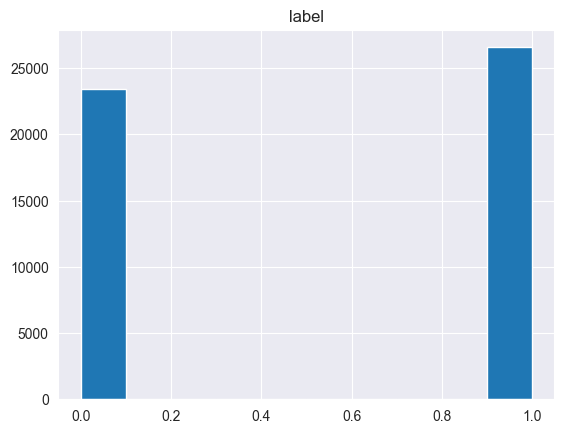

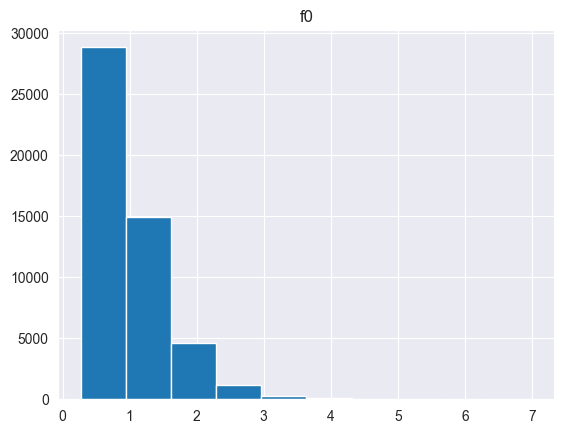

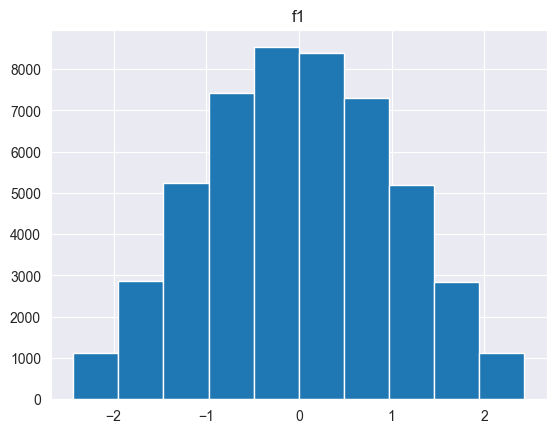

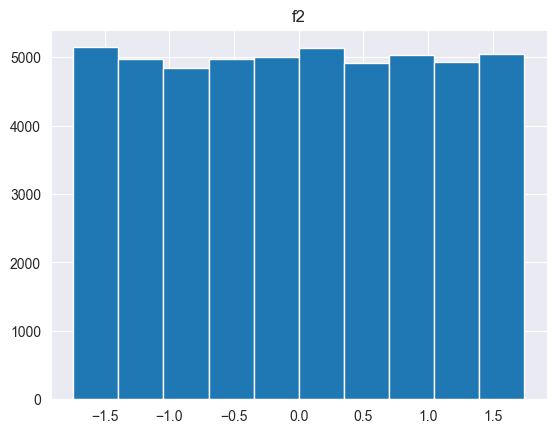

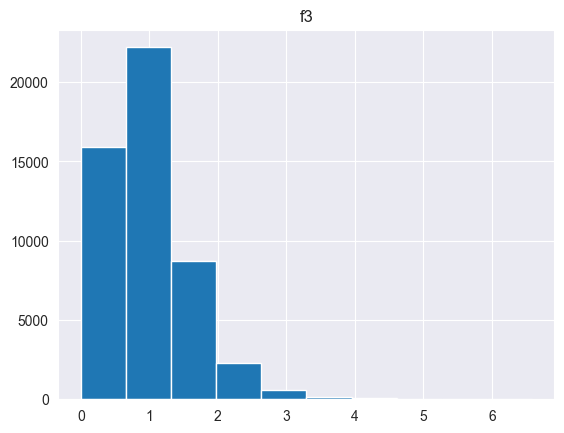

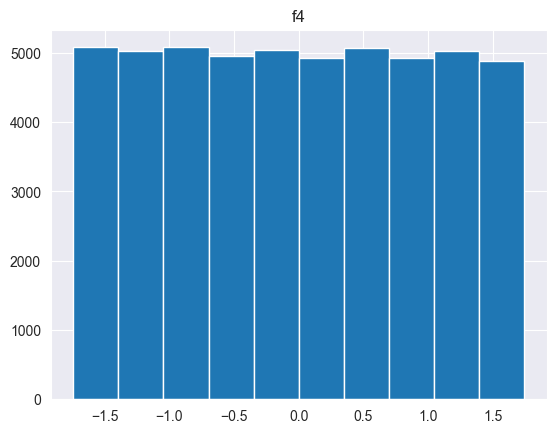

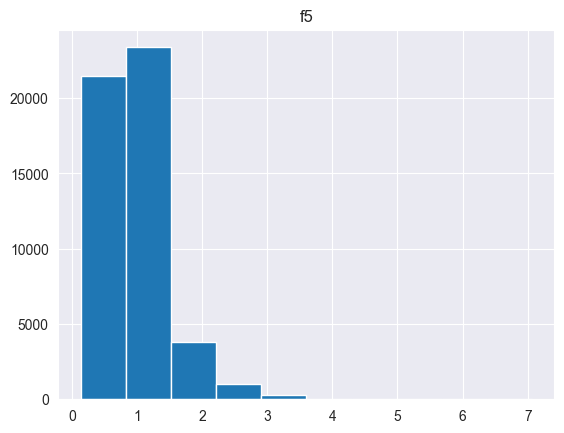

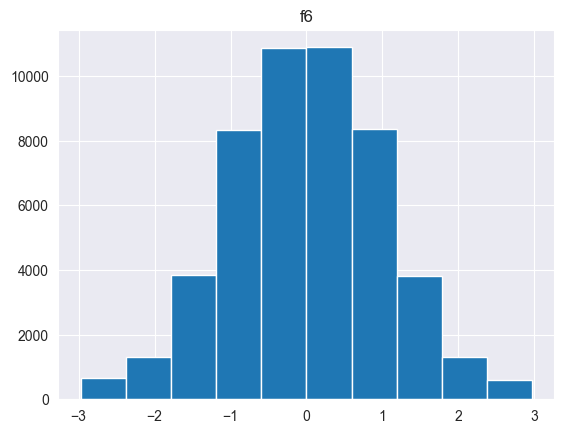

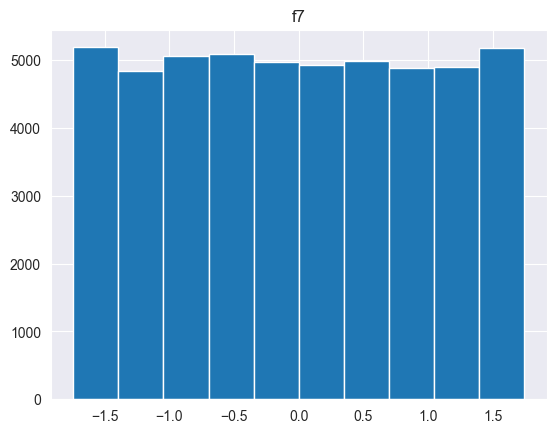

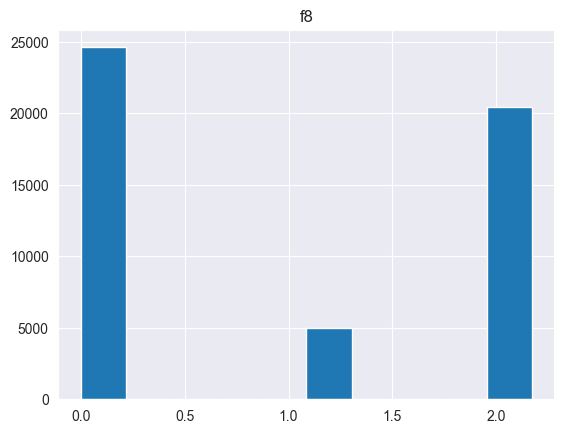

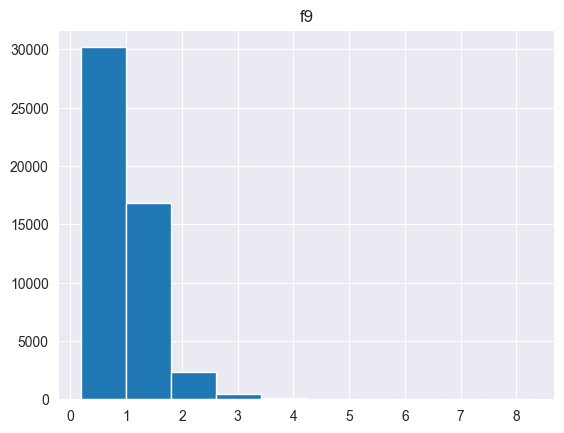

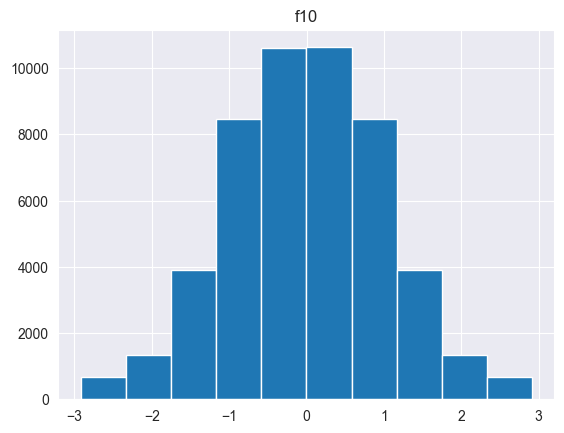

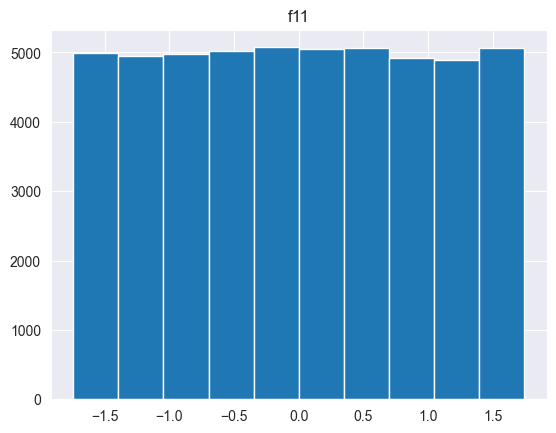

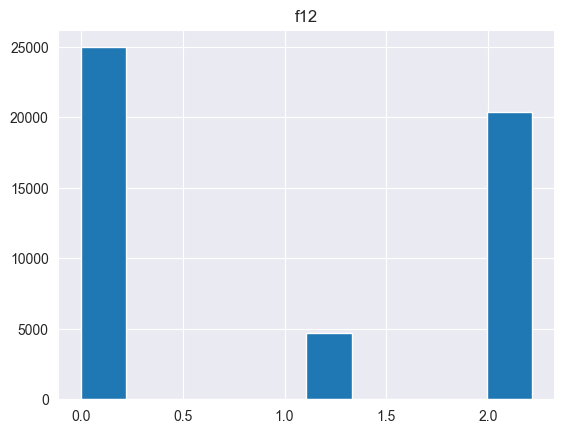

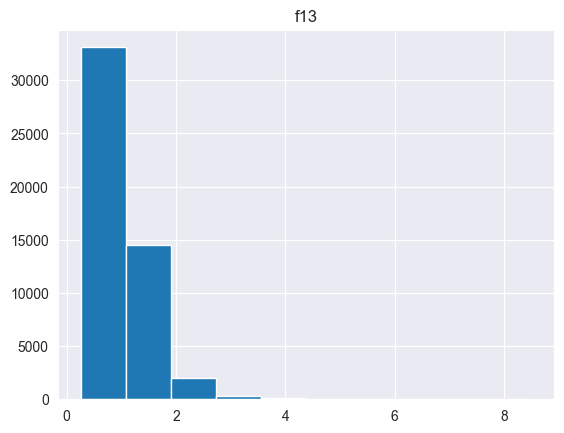

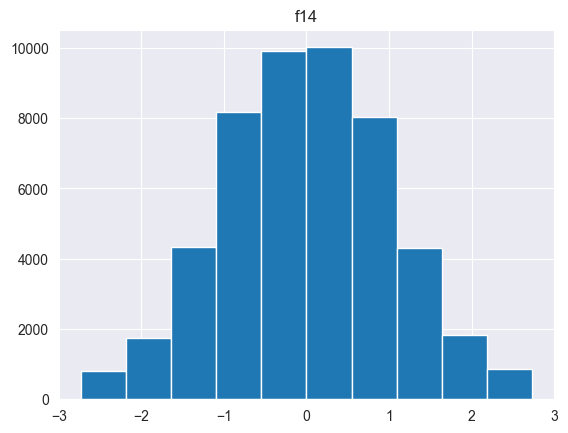

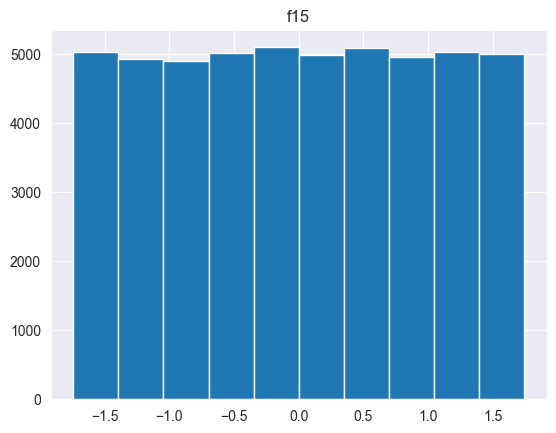

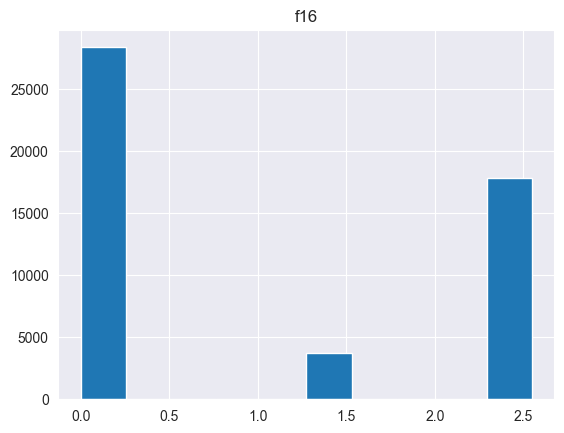

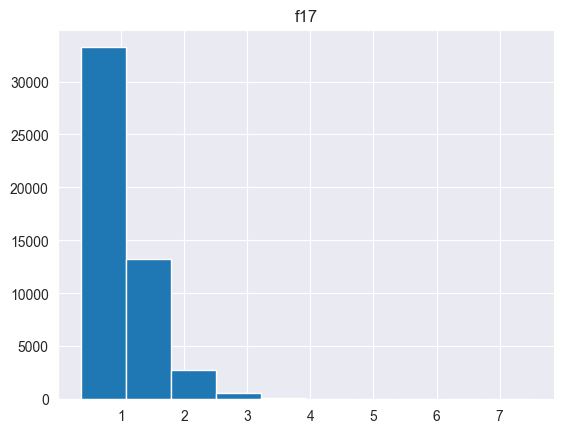

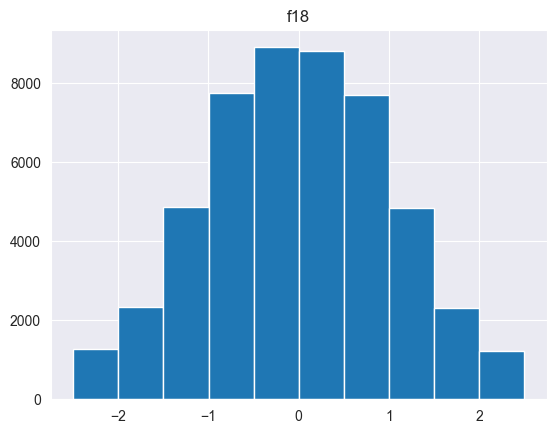

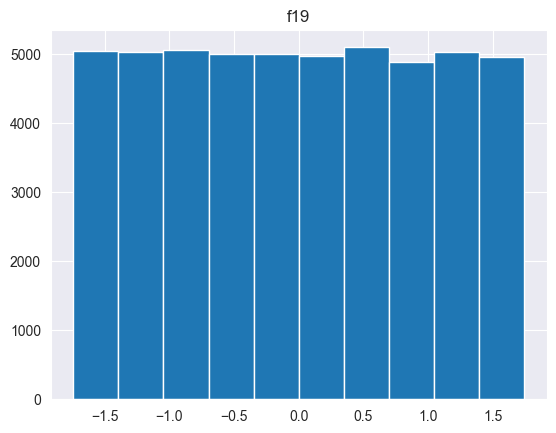

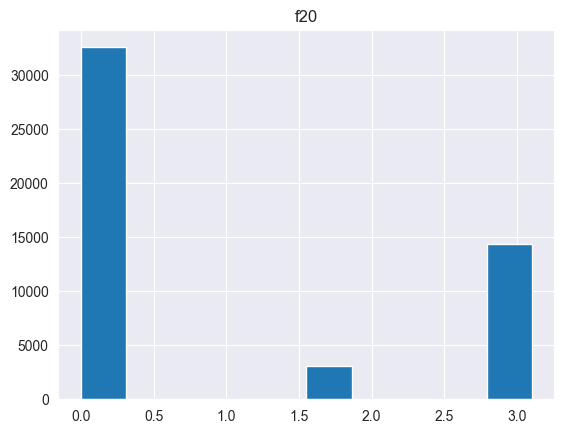

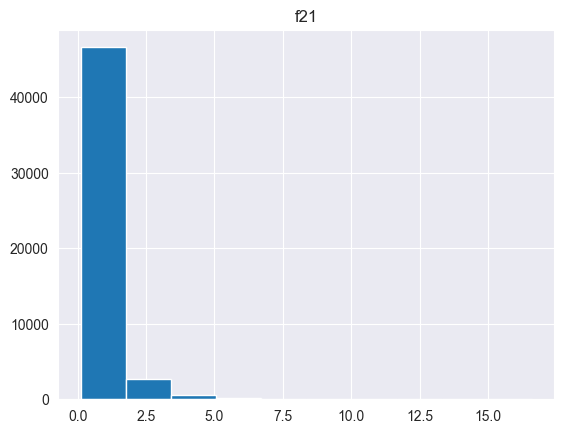

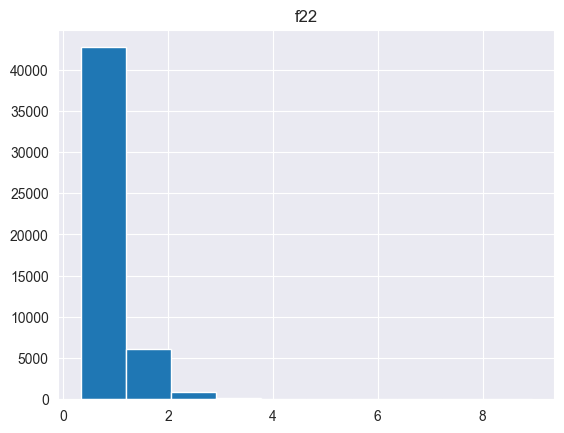

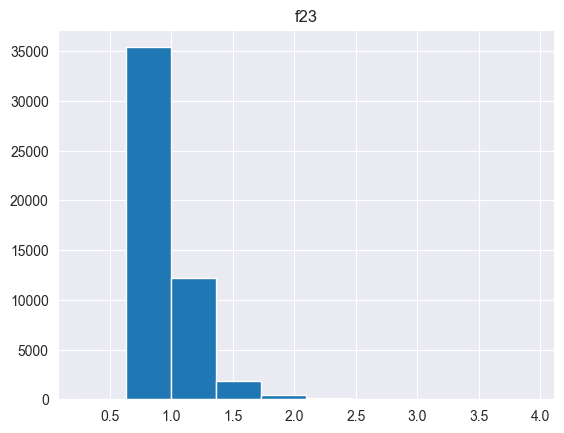

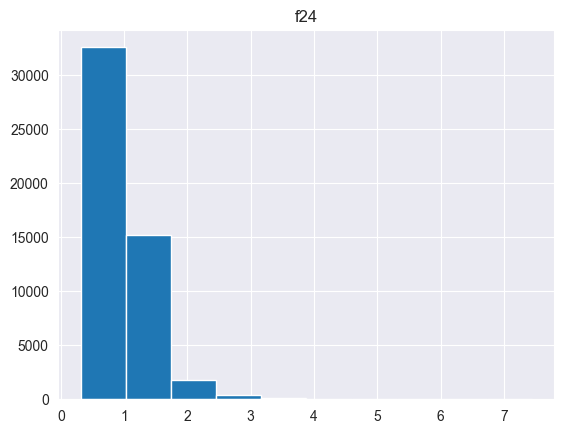

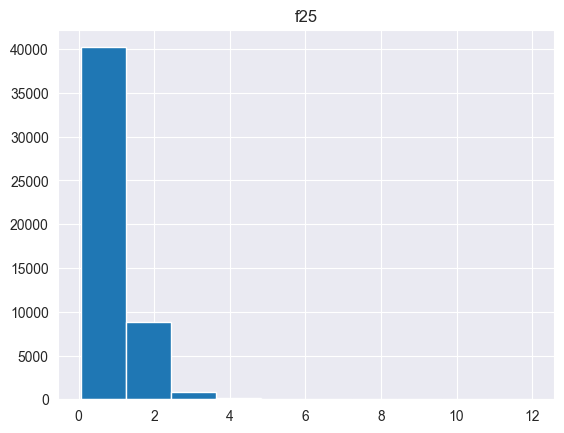

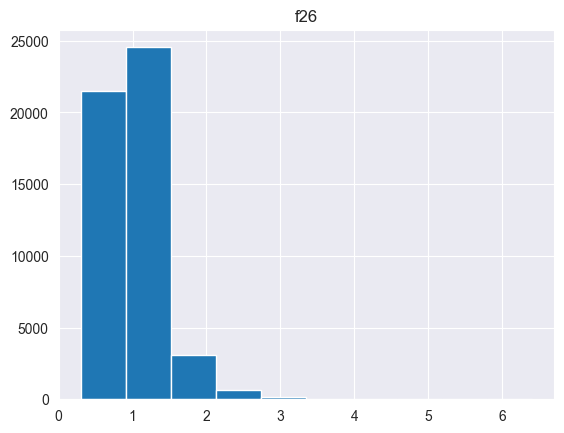

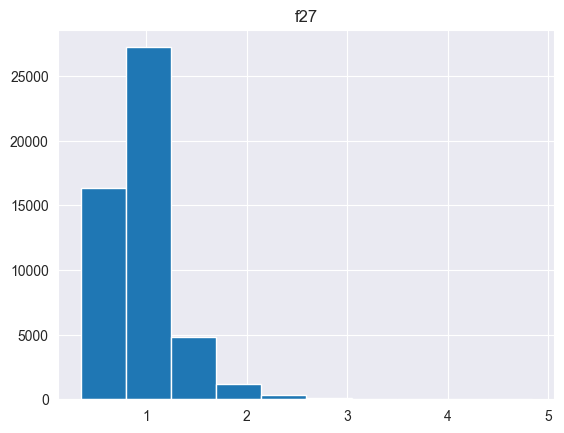

In [13]:
for i in training.columns:
    plt.hist(training[i])
    plt.title(i)
    plt.show()

          label        f0        f1        f2        f3        f4        f5  \
label  1.000000 -0.051872 -0.007501  0.002977 -0.094442 -0.008044  0.049674   
f0    -0.051872  1.000000 -0.004442  0.001025 -0.138891 -0.001533  0.175633   
f1    -0.007501 -0.004442  1.000000 -0.002513 -0.002453  0.003578  0.000677   
f2     0.002977  0.001025 -0.002513  1.000000  0.003273 -0.053338 -0.008121   
f3    -0.094442 -0.138891 -0.002453  0.003273  1.000000  0.003533  0.196777   
f4    -0.008044 -0.001533  0.003578 -0.053338  0.003533  1.000000 -0.002735   
f5     0.049674  0.175633  0.000677 -0.008121  0.196777 -0.002735  1.000000   
f6    -0.008622 -0.000380  0.269530 -0.000939 -0.008384 -0.003730 -0.002768   
f7    -0.004010  0.002784 -0.001804 -0.169199  0.000295 -0.150982 -0.004980   
f8    -0.011846 -0.004676  0.002068  0.001860 -0.026451  0.002640 -0.017354   
f9     0.020275  0.007342  0.004242 -0.002348  0.034967  0.000010  0.482917   
f10    0.000760 -0.009257  0.265495  0.004503  0.006

<Axes: >

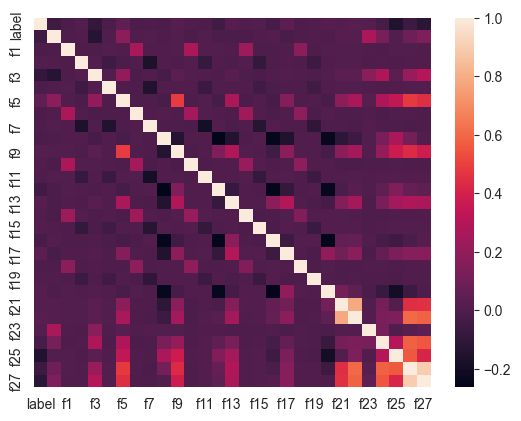

In [14]:
print(training.corr())
sns.heatmap(training.corr())

Based on the heatmap above, it appears that most of the features are not highly correlated with each other. This is good because it means that the features are independent of each other. The features showing strongest correlation appear to be those in the range of f23 to f26.